<a href="https://colab.research.google.com/github/cindylrs04/PCVK25_3F_06/blob/main/Week9_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cindy Laili Larasati - 06

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
!apt install tesseract-ocr -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [23]:
!pip install pytesseract

In [24]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

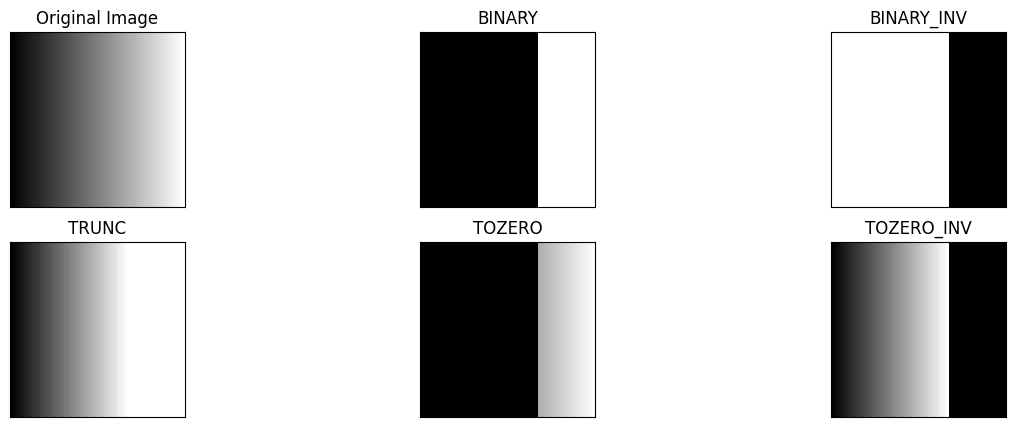

In [25]:
filename = '/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/gradient.jpg'
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)

thresh1 = img.copy()
thresh2 = img.copy()
thresh3 = img.copy()
thresh4 = img.copy()
thresh5 = img.copy()

thresh = 170

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1[img > thresh] = 255
thresh1[img <= thresh] = 0

#2. thresh2 adalah binary threshold inverse
thresh2[img > thresh] = 0
thresh2[img <= thresh] = 255

#3. Threshold Truncate
thresh3[img > thresh] = thresh

#4. Threshold Tozero
thresh4[img <= thresh] = 0

#5. Threshold Tozero Inverse
thresh5[img > thresh] = 0

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

Nilai threshold Otsu: 167


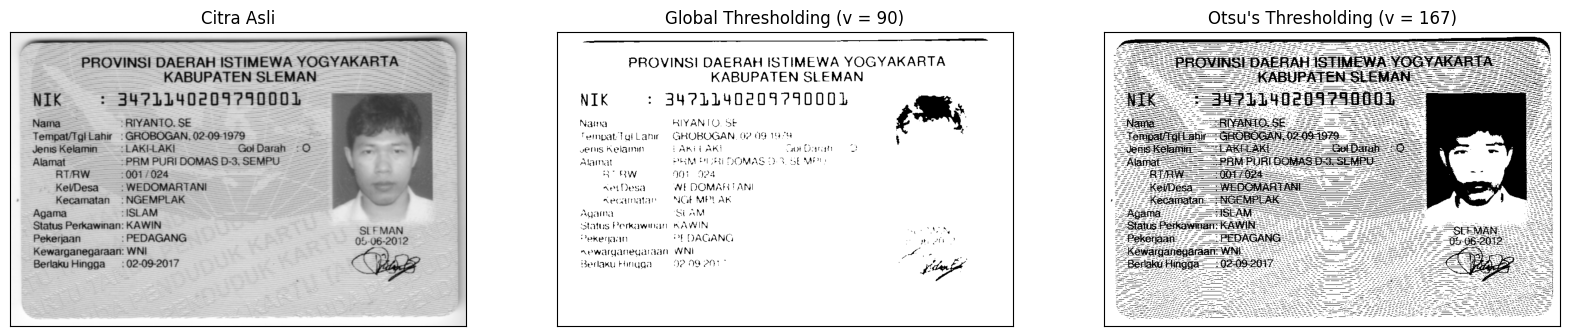

In [26]:
filename = '/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/ktp.png'
img = cv.imread(filename, 0)
blur = cv.GaussianBlur(img, (5,5), 0)

def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0/pixel_number
    his, bins = np.histogram(gray, np.arange(0,257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)

    for t in range(1, 256):
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])

        if pcb == 0 or pcf == 0:
            continue

        Wb = pcb * mean_weight
        Wf = pcf * mean_weight
        mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)

        value = Wb * Wf * (mub - muf) ** 2
        if value > final_value:
            final_thresh = t
            final_value = value

    final_img = gray.copy()
    print("Nilai threshold Otsu:", final_thresh)

    final_img[gray > final_thresh] = 255
    final_img[gray <= final_thresh] = 0
    return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(img)
x = "Otsu's Thresholding (v = " + str(otsu_thresh) + ")"

ret, th1 = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]

plt.figure(figsize = (20,15))
for i in range(len(citra3)):
    plt.subplot(1,3,i+1)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.

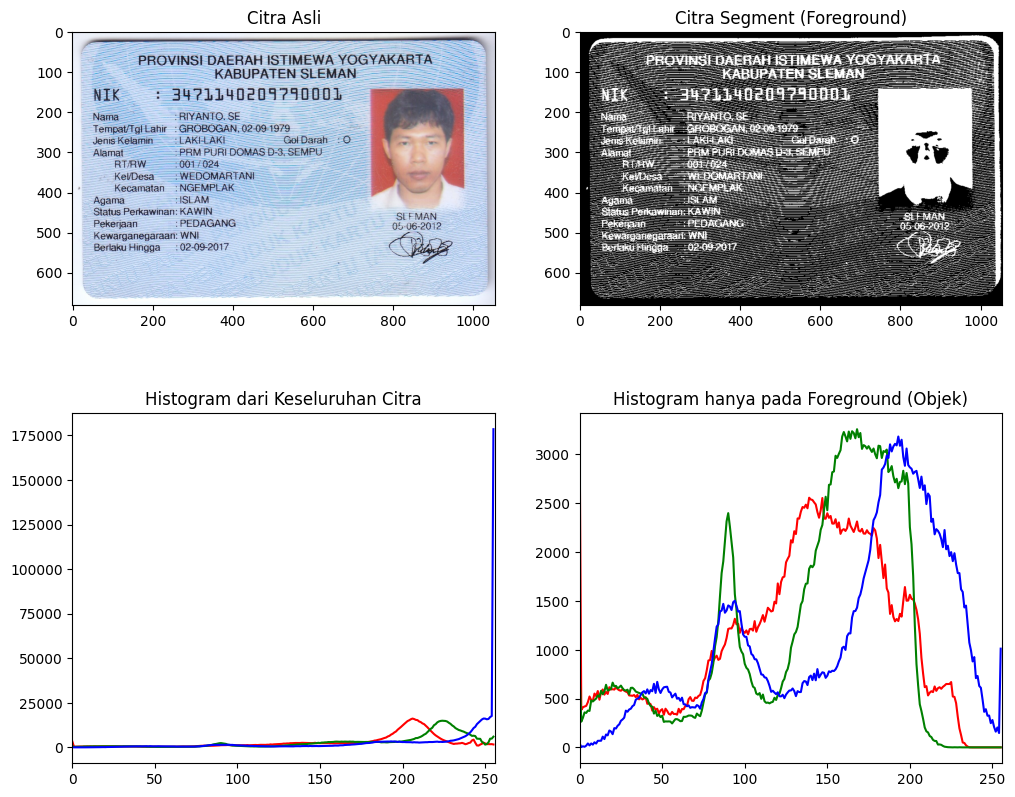

In [27]:
filename = '/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/ktp.png'

img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Citra Asli')

plt.subplot(2,2,2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segment (Foreground)')

color = ('r', 'g', 'b')

plt.subplot(2,2,3)
for i, col in enumerate(color):
    hist0 = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist0, color=col)
plt.title('Histogram dari Keseluruhan Citra')
plt.xlim([0, 256])

plt.subplot(2,2,4)
for i, col in enumerate(color):
    hist1 = cv.calcHist([img], [i], mask, [256], [0, 256])
    plt.plot(hist1, color=col)
plt.title('Histogram hanya pada Foreground (Objek)')
plt.xlim([0, 256])

plt.show()

6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

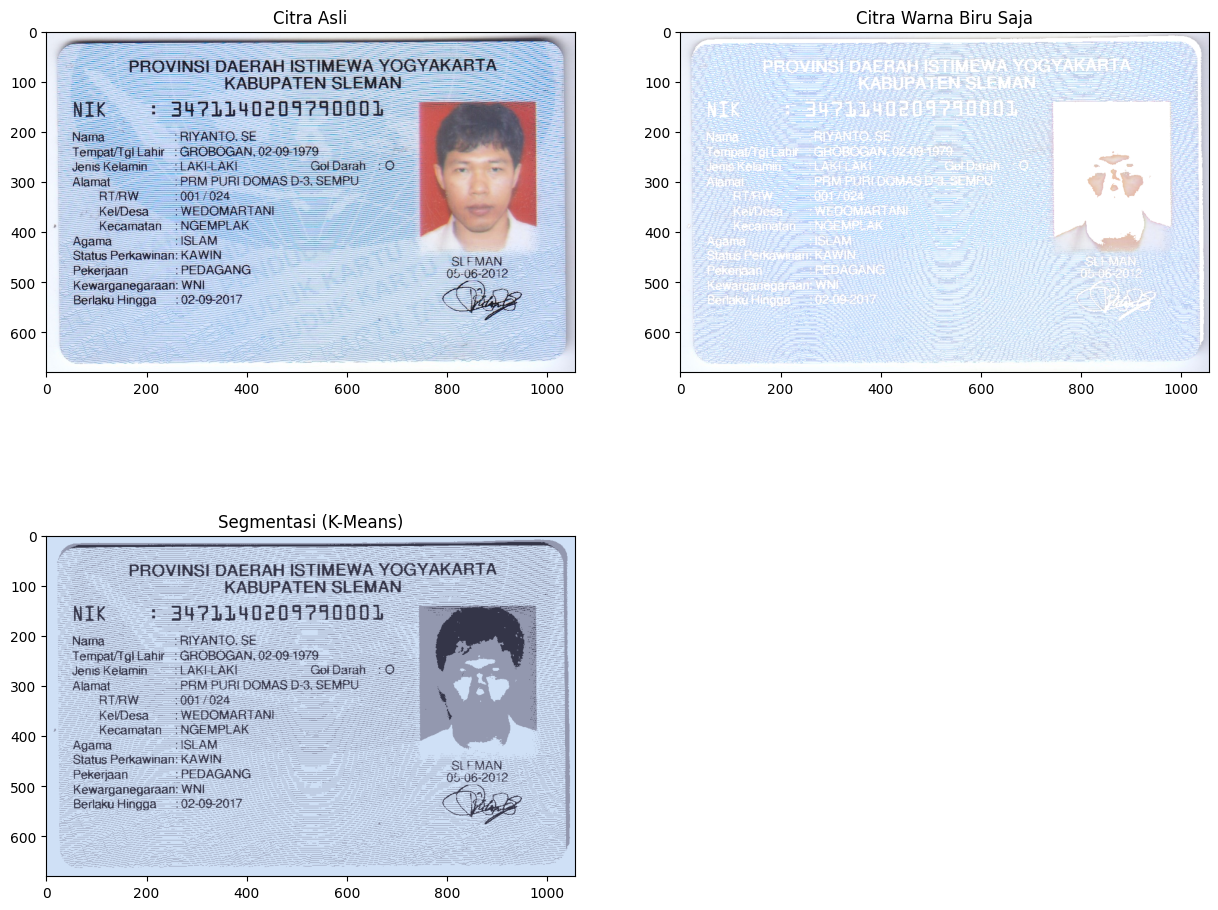

In [28]:
filename = '/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/ktp.png'
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)

k = 3
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
labels = labels.flatten()

segmented_image = centers[labels]
segmented_image = segmented_image.reshape(img.shape)

blue_index = np.argmax(centers[:, 2])

masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != blue_index] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1), plt.imshow(img), plt.title('Citra Asli')
plt.subplot(2, 2, 2), plt.imshow(masked_image0), plt.title('Citra Warna Biru Saja')
plt.subplot(2, 2, 3), plt.imshow(segmented_image), plt.title('Segmentasi (K-Means)')
plt.show()

7. Proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan.

In [29]:
!pip install pytesseract

In [30]:
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


2. Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian
kita tunjukan objek figure kita dengan method show()

In [31]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)
    plt.show()

3. Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file

In [32]:
import cv2
import pytesseract
from pytesseract import Output

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/ktp.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed, output_type=Output.DICT)
print(text1.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


4. Menambahkan kotak untuk deteksi teksi pada gambar

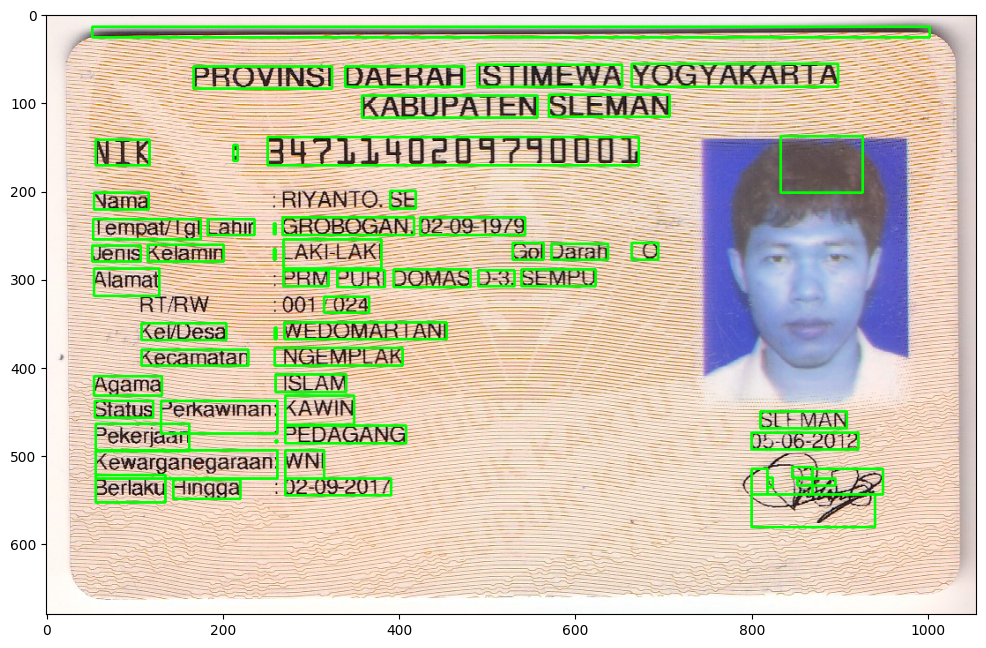

In [33]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 0:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)

5. Hasil pembacaan KTP Menjadi text

In [34]:
!apt-get install tesseract-ocr -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



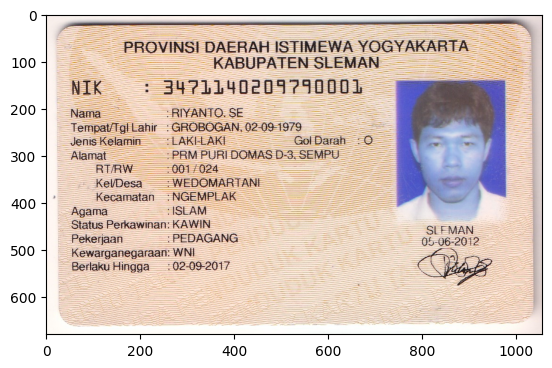

In [35]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/ktp.png")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

8. Tugas berikutnya adalah mengimplementasikan hasil citra yang telah diproses dengan
GLOBAL THRESHOLDING dan hasilnya diproses untuk membaca teks yang terdapat
pada KTP.

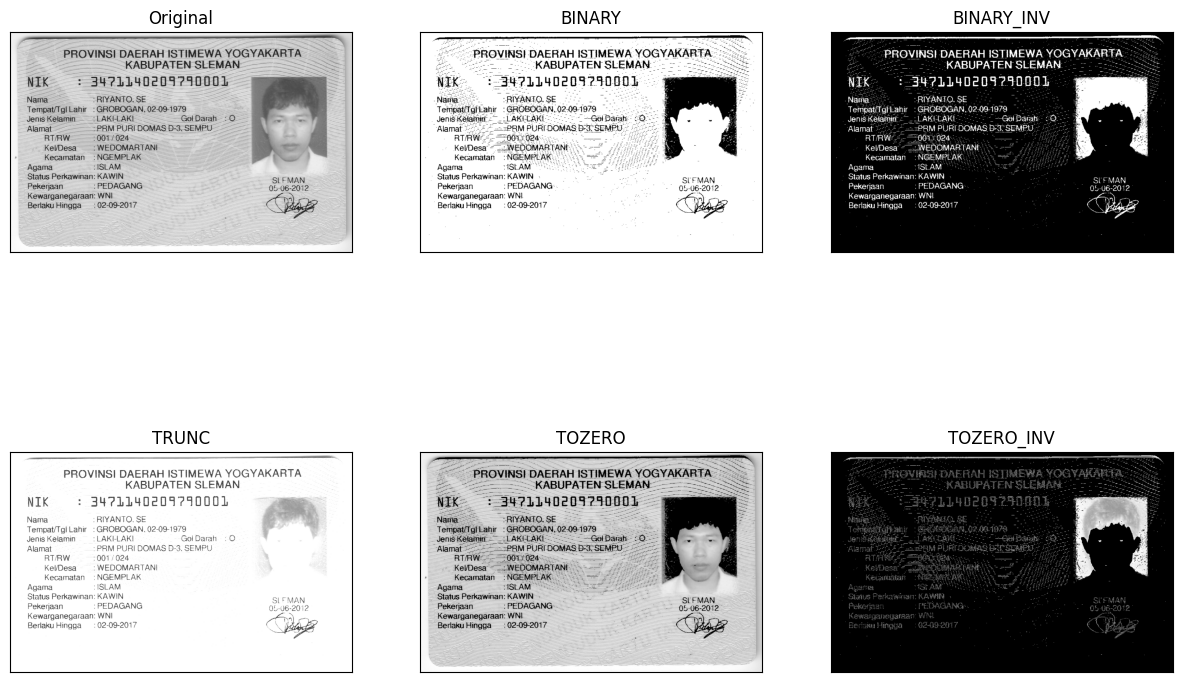

In [36]:
filename = ('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/ktp.png')
img = cv.imread(filename)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# BINARY
ret1, thresh_binary = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)

# BINARY_INV
ret2, thresh_binary_inv = cv.threshold(gray, 127, 255, cv.THRESH_BINARY_INV)

# TRUNC
ret3, thresh_trunc = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)

# TOZERO
ret4, thresh_tozero = cv.threshold(gray, 127, 255, cv.THRESH_TOZERO)

# TOZERO_INV
ret5, thresh_tozero_inv = cv.threshold(gray, 127, 255, cv.THRESH_TOZERO_INV)

titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [gray, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

In [39]:
import cv2
import pytesseract

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/ktp.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 3)

thresh_binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]
thresh_binary_inv = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)[1]
thresh_trunc = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)[1]
thresh_tozero = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO)[1]
thresh_tozero_inv = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO_INV)[1]

print("Teks Hasil Global Thresholding\n")

threshold_types = {
    'BINARY': thresh_binary,
    'BINARY_INV': thresh_binary_inv,
    'TRUNC': thresh_trunc,
    'TOZERO': thresh_tozero,
    'TOZERO_INV': thresh_tozero_inv
}

custom_config = r'--oem 3 --psm 6 -l ind'

for name, thresh_img in threshold_types.items():
    print(f"Teks Hasil dengan {name} Thresholding".center(60, "="))

    thresh_img = cv2.convertScaleAbs(thresh_img)

    text = pytesseract.image_to_string(thresh_img, config=custom_config)

    lines = [line.strip() for line in text.splitlines() if line.strip()]
    clean_text = "\n".join(lines)

    print(clean_text)
    print("=" * 60 + "\n")

Teks Hasil Global Thresholding

===========Teks Hasil dengan BINARY Thresholding============
Ea
PROVINSI DAERAH ISTIMEWA YOGYAKARTA — ..
KABUPATEN SLEMAN Oa
NIK : 34?2110209?90001
Nama RIYANIO. SE .
Tempat'Tgl Lahir : GROBOGAN. 02 09 1979
Jenis Kelamin “LAKI LAKI Goi Darah : 0 - -
Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001. 024
KelDesa : WEDOMARTANI
Kecamatan - NGEMPLAK
Agama ISLAM
Status Perkawinan: KAWIN Si? MAN
Pekerjaan PEDAGANG GH U6:20”2
Kewarganegaraan: WNI N .
Berlaru Hingga 02-09-2017 “Pos

=========Teks Hasil dengan BINARY_INV Thresholding==========
oa...
PROVINSI DAERAH ISTIMEWA YOGYAKARTA — ..
NO NI Kai Pa
DG : 34?2110209790001
Nu RIYANIO. SE P
Tempat'Tgl Lahir : GROBOGAN. 02 09 1979
Jenis Kelamin PPN B Ea Le ADI NO) P -
PA ETanaNi PRM PURI DOMAS D-3. SEMPU
aksi BN OOM Oya.
KelDesa : WEDOMARTANI
Kecamatan - NGEMPLAK
Pore llkal PAN
Status Perkawinan: KAWIN NN ANN!
Pekerjaan kan erale TAN rap
Kewarganegaraan: WNI N .
Berlaru Hingga 02-09-2017 an

============Teks Hasil dengan